In [ ]:
#STEP 1 — Install & Import

!pip install pandas nltk matplotlib seaborn

In [ ]:
#Download VADER lexicon:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Step 2 — Import Libraries

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Step 3 — Load Your Dataset
df = pd.read_csv("tweets.csv")

print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())


Saving tweets.csv to tweets (2).csv


In [ ]:
#STEP 4 — Keep Only English Tweets

df = df[df['language'] == 'en']
df = df.dropna(subset=['content'])
df.reset_index(drop=True, inplace=True)

print("Total English Tweets:", len(df))

Total English Tweets: 46934


```
# What VADER does:
It gives four scores:
pos → positive score
neg → negative score
neu → neutral score

compound → overall sentiment (-1 to +1)
Compound score interpretation:
≥ 0.05 → Positive
≤ -0.05 → Negative
Otherwise → Neutral
```


In [ ]:
#STEP 5 — Initialize VADER

sia = SentimentIntensityAnalyzer()

In [ ]:
#STEP 6 — Create Sentiment Function

def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']

    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

In [ ]:
#STEP 7 — Apply Sentiment to Dataset

df['sentiment'] = df['content'].apply(get_sentiment)

print(df[['content', 'sentiment']].head())


                                             content sentiment
0  Is history repeating itself...?#DONTNORMALIZEH...   neutral
1  @barackobama Thank you for your incredible gra...  positive
2                Life goals. https://t.co/XIn1qKMKQl   neutral
3            Me right now 🙏🏻 https://t.co/gW55C1wrwd   neutral
4  SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...   neutral


In [ ]:
#STEP 8 — Check Sentiment Distribution

print(df['sentiment'].value_counts())

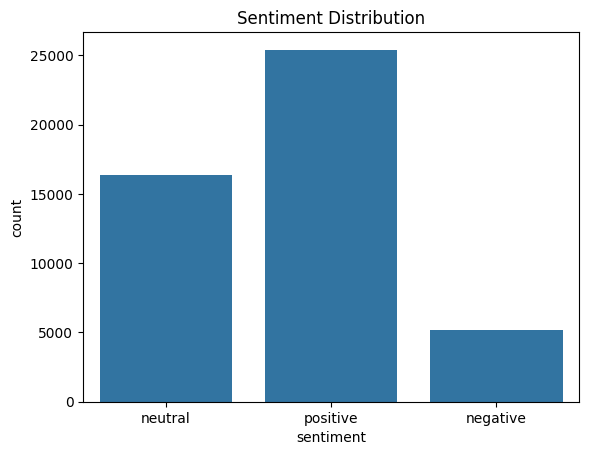

In [ ]:
#STEP 9 — Visualize Results

plt.figure()
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
#STEP 10 — Predict New Tweet

def predict_sentiment(new_text):
    score = sia.polarity_scores(new_text)
    compound = score['compound']

    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

In [ ]:
#Test
print(predict_sentiment("I absolutely love this!"))
print(predict_sentiment("This is terrible and disappointing."))
print(predict_sentiment("It was okay, nothing special."))